<a href="https://colab.research.google.com/github/admitkok/Statistics/blob/main/probability_and_statitsics_2024_real_world_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability & Statistics** - Graded Assignment 8

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# TODO read the dataset
data = pd.read_csv("/churn.csv")

## **Task 1 *(5 points)*** - Exploratory data analysis

In this section, you will get to know the data you are working with.

First, describe the dataset in a couple of sentences. Mention what it's about, which information is available in it, etc.

I decided to work with bank customer churn dataset.
In this task I will check how different characterisrics of a customer affects his behaviour.

Now, highlight at least three interesting things one can learn from the dataset. Make some plots, summary tables, etc., and always include an explanation of what you see in plain English. Make it a short data story that is interesting to read!

You can use our *Titanic* and *Mammals* notebooks as an inspiration.

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

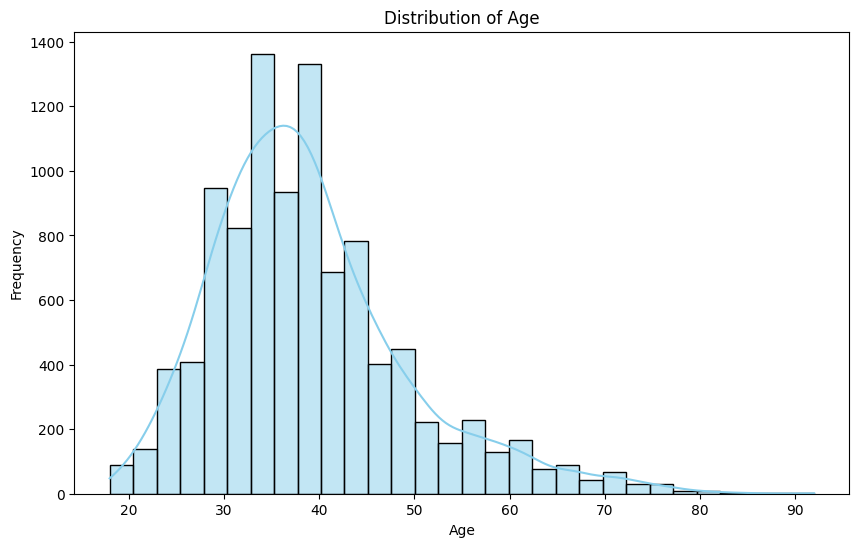

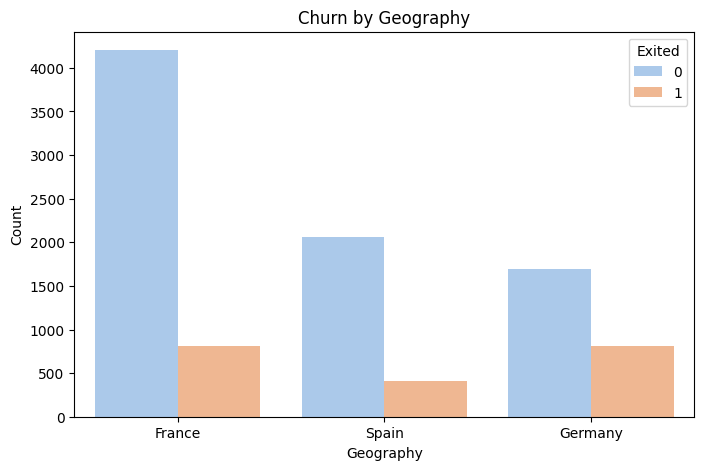

   Gender       Balance
0  Female  75659.369139
1    Male  77173.974506


In [9]:
print(data.head())

#Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Churn by Geography
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=data, palette='pastel')
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

#Average Balance by Gender
balance_by_gender = data.groupby('Gender')['Balance'].mean().reset_index()
print(balance_by_gender)


# Intersting observations

1. The age distribution is right-skewed, with a higher frequency of younger customers.
2. Churn varies by geography, suggesting that customers from certain regions might be more likely to churn.
3. On average, the balance in the account is similar for both genders, indicating a balanced financial engagement.

## **Task 2 *(5 points)*** - Hypothesis testing

Formulate 1-2 hypotheses and test it Based on the available data.

For every hypothesis, clearly state:
1. the hypothesis that is being tested in plain English  
2. $H_0$ and $H_1$
3. which statistical test you've chosen
4. why is the test applicable (what are the assumptions of the test? are they satisfied?)
5. how do you interpret the outcome of the test





**Hypothesis 1:**

Hypothesis: The average age differs between customers who exited and those who did not.

H0 : The average age of customers who exited is equal to those who did not.

H1: The average age of customers who exited is not equal to those who did not.

Test: Two-Sample T-Test.

Applicability: Suitable for comparing means of two independent groups, assumes normality and homogeneity of variances.

Interpretation: A significant p-value (< 0.05) suggests a difference in average age between exiting and non-exiting customers.



---


**Hypothesis 2:**

Hypothesis: The proportion of customers who exited differs between those with and without a credit card.

H0: The proportion of customers who exited is the same for those with and without a credit card.

H1: The proportion of customers who exited differs between those with and without a credit card.

Test: Chi-Square Test of Independence.

Applicability: Assesses association between two categorical variables; assumes categorical data and independence of observations.

Interpretation: A significant p-value implies a significant association between having a credit card and the likelihood of exiting the bank.

In [15]:
from scipy.stats import ttest_ind, chi2_contingency

# Hypothesis 1 Test
print('Hypothesis 1 Test')
exit_age = data[data['Exited'] == 1]['Age']
non_exit_age = data[data['Exited'] == 0]['Age']

t_stat, p_value = ttest_ind(exit_age, non_exit_age)

print(f'Two-Sample T-Test p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Average age differs between customers who exited and those who did not.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average age.")

print('---------------------------------------------------------------------------------------------------')

# Hypothesis 2 Test
print('Hypothesis 2 Test')
credit_exit_table = pd.crosstab(data['HasCrCard'], data['Exited'])

chi2_stat, p_value, _, _ = chi2_contingency(credit_exit_table)

print(f'Chi-Square Test p-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis: The proportion of customers who exited differs between those with and without a credit card.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the proportion of exits.")




Hypothesis 1 Test
Two-Sample T-Test p-value: 1.2399313093427738e-186
Reject the null hypothesis: Average age differs between customers who exited and those who did not.
---------------------------------------------------------------------------------------------------
Hypothesis 2 Test
Chi-Square Test p-value: 0.49237236141554686
Fail to reject the null hypothesis: No significant difference in the proportion of exits.
